<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression,-Mostly-Polynomial-regression" data-toc-modified-id="Regression,-Mostly-Polynomial-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression, Mostly Polynomial regression</a></span><ul class="toc-item"><li><span><a href="#The-Maths" data-toc-modified-id="The-Maths-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Maths</a></span><ul class="toc-item"><li><span><a href="#Set-up-and-Visuliazing-the-Maximum-likelihood" data-toc-modified-id="Set-up-and-Visuliazing-the-Maximum-likelihood-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Set up and Visuliazing the Maximum likelihood</a></span></li><li><span><a href="#Maximum-likelihood-Formulation-and--Least-square-error" data-toc-modified-id="Maximum-likelihood-Formulation-and--Least-square-error-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Maximum likelihood Formulation and  Least square error</a></span></li><li><span><a href="#Determining-model-parameters---First-Way" data-toc-modified-id="Determining-model-parameters---First-Way-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Determining model parameters - First Way</a></span></li><li><span><a href="#Determining-model-parameters---Second-Way" data-toc-modified-id="Determining-model-parameters---Second-Way-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Determining model parameters - Second Way</a></span></li><li><span><a href="#Determining-variance-of-model" data-toc-modified-id="Determining-variance-of-model-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Determining variance of model</a></span></li></ul></li><li><span><a href="#The-Code" data-toc-modified-id="The-Code-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The Code</a></span></li><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gradient descent</a></span></li></ul></li><li><span><a href="#Over-&amp;-Under-Fitting" data-toc-modified-id="Over-&amp;-Under-Fitting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Over &amp; Under Fitting</a></span><ul class="toc-item"><li><span><a href="#Some-Example-Code-of-Under/Over-Fitting" data-toc-modified-id="Some-Example-Code-of-Under/Over-Fitting-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Some Example Code of Under/Over Fitting</a></span></li></ul></li></ul></div>

# Regression, Mostly Polynomial regression
## The Maths

### Set up and Visuliazing the Maximum likelihood 
First I highly recommend this [source](http://suriyadeepan.github.io/2017-01-22-mle-linear-regression/). I will most likely borrow some images from this source. He does a good job of explaining regression. With that let us begin with a generlised case of regression. First we gather some set of indepdent input or data which we will call $x_i$ and also we collect some depdendent data or outputs $y_i$. We can write a gernalised model as:
    
\begin{align}
 y_i = f(x_i) + \epsilon
\end{align}

Here $f$ is some unknown model/function, giving some output or label y, such as a linear model, and $\epsilon$ is some random noise term, which makes us not get exactly y. We would like to estimate $f$ to some model which we will call $g(x|\theta)$, where $\theta$ is our model paramters.

With this random noise term we can assume that is is a Gaussian with zero mean i.e $\epsilon = \mathcal{N}(0,\sigma^2)$, thus given each data point $x_i$, each point $y_i$ can be seen as a gaussian distrbution with mean $g$:

\begin{align}
 P(y_i|x_i) ~ g(x_i|\theta) +\mathcal{N}(0,\sigma^2) \\
 = \mathcal{N}(g(x_i|\theta),\sigma^2)
\end{align}


Thus by maximizing the product of individual probailities, given some learning parameter $\theta$, we will gain the Maximum liklehood of our estiamtor g, given $\theta$. This can be shown in the figure below for a linear model, where each point is a guassian distburtion and we would like to find $\theta$ which maximises the product of all the proabilities: 

![Linear plot](http://suriyadeepan.github.io/img/mle/lr2.png)






### Maximum likelihood Formulation and  Least square error

Because $(x_i,y_i)$ are pairs drawn from some unknown joint probability densitiy p(x,y), we can write:

\begin{align}
 P(y,x) = p(y|x)p(x)
\end{align}

Thus bring it all together and going into the log domain for ease the total likelihood is:

\begin{align}
\mathcal{L}(\theta|X) = \log \prod_{i}^N p(y_i,x_i) \\
= \log \prod_{i}^N p(y_i|x_i)p(x_i) \\
= \log \prod_{i}^N p(y_i|x_i)+\log \prod_{i}^N p(x_i) \\
\end{align}

ignoring $p(x_i)$ as it does not depdent on our model param $\theta$

\begin{align}
\mathcal{L}(\theta|X) = \log \prod_{i}^N p(y_i|x_i) \\
= \log \prod_{i}^N \frac{1}{(2\pi)^{1/2}\sigma}exp\left( \frac{-(y_i-g(x_i|\theta))^2}{2\sigma^2} \right)\\
= \log \frac{1}{(2\pi)^{N/2}\sigma^N}exp\left( \frac{-\sum_i^N (y_i-g(x_i|\theta))^2)}{2\sigma^2} \right)\\
= -\frac{N}{2}\log (2\pi\sigma^2) -\frac{\sum_i^N (y_i-g(x_i|\theta))^2)}{2\sigma^2}
\end{align}


First term is independent of the parameters $\theta$ and can be dropped, and setting the deravative of this would lead to removing the $1/\sigma$ factor. Thus we want to maximize or minimize if we remove the negative term $\sum_i^N (y_i-g(x_i|\theta)^2)$. This is also known as the mean squared error which is common in least square methods of minimizing.  Now we can assume our model is some N sized polynomial i.e $g(x_i|\theta) = x_i\theta^T$, where $\theta = (w_{0},w_{1},...,w_{k})$, where $w_{0}$, coresponds to a x value of 1, i.e the y intercept. 


### Determining model parameters - First Way

Now there are two ways you can do this. The first way is equating $g(x_i|w_k,...,w_1,w_0) = w_kx_i^k+...+w_1x_i^2+w_1x_i + w_0$. This leads to doing the dervative for each weight, i.e :

\begin{align}
\frac{d}{dw_0}\sum_i^N (y_i-w_kx_i^k+...+w_1x_i^2+w_1x_i + w_0)^2=0 \\
\frac{d}{dw_1}\sum_i^N (y_i-w_kx_i^k+...+w_1x_i^2+w_1x_i + w_0)^2=0 \\
\vdots \\
\frac{d}{dw_k}\sum_i^N (y_i-w_kx_i^k+...+w_1x_i^2+w_1x_i + w_0)^2=0 
\end{align}


If you go through and equate you end up getting a pattern of:

\begin{align}
\sum_i^N y_i = Nw_0 + w_1 \sum_i x_i +... w_k \sum_i x_i^k \\
\sum_i y_ix_i = \sum_i x_i + w_1 \sum_i x_i^2 +... w_k \sum_i x_i^{k+1} \\
\vdots \\
\sum_i y_ix_i^k = \sum_i x_i^k + w_1 \sum_i x_i^{k+1} +... w_k \sum_i x_i^{2k}
\end{align}

This can be converted to a matrix form and solved for $\theta=A^{-1}b$:


\begin{align}
A = \begin{bmatrix} N &  \sum_i x_i & ... & \sum_i x_i^k \\
                \vdots & \vdots & \ddots & \vdots \\  
                   \sum_i x_i^k & \sum_i x_i^{k+1} & ... &\sum_i x_i^{2k} \\ 
\end{bmatrix} \\
\theta = \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_k \end{bmatrix},
b = \begin{bmatrix} \sum_i y_i \\ \sum_i y_ix_i \\ \vdots \\ \sum_i y_ix_i^k \end{bmatrix}
\end{align}


This is quite complicated. Likely we can simplify greatly by taking out the sums and converting into a matrix form by making $A=X^TX$ and $b=X^TY$, where X and Y is:

\begin{align}
X = \begin{bmatrix} 1 & x_0 & ... & x_0^k \\
                \vdots & \vdots & \ddots & \vdots \\  
                   1 & x_N & ... & x_N^k  \\ 
\end{bmatrix},
Y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_N \end{bmatrix}
\end{align}

Where N is the index to the data point and k is the polynomial order. Thus the maximum likelihood is solving for:

\begin{align}
\theta=A^{-1}b = (X^TX)^{-1}X^TY
\end{align}

### Determining model parameters - Second Way

This way starts with premise of using the matrix X and Y from the first way. Here X is a matrix which transforms our weights into y.  Converting our sums in the least square error formula($LSE = \sum_i^N y_i-x_i\theta)^2 $) into vector form and finding the derivative:

\begin{align}
LSE(\theta) = (Y-X\theta)^T(Y-X\theta) \\
\frac{dLSE(\theta)}{d\theta} = -2X^T(Y-X\theta) \ \ \ * \\
0 = X^T(Y-X\theta)  \\
X^TX\theta = X^TY  \\
\theta = (X^TX)^{-1}X^TY  \\
\end{align}

*Derivative output had to be $X^T$(dim Nxk) to multiple with N dim Y correctly instead of k(poly size) dim.


### Determining variance of model

To determine the variance of our model we go to the original maximum likelihood function and maximize for $\sigma$ by finding the derivative:

\begin{align}
0 = -N\sigma+\frac{(Y-X\theta)^T(Y-X\theta)}{\sigma^3} \\ 
\sigma^2 = \frac{(Y-X\theta)^T(Y-X\theta))}{N} \\ 
\sigma^2 = \frac{(Y-X\theta)^T(Y-X\theta)}{N} \\
\end{align}

## The Code
Let us do a simple linear model with some made up data

In [51]:
import numpy as np
import matplotlib.pyplot as plt

fit: y= 3.609278643936886 +(x^1)*5.361574899984981 +(x^2)*2.933134595140672 
variance:  0.932081021934


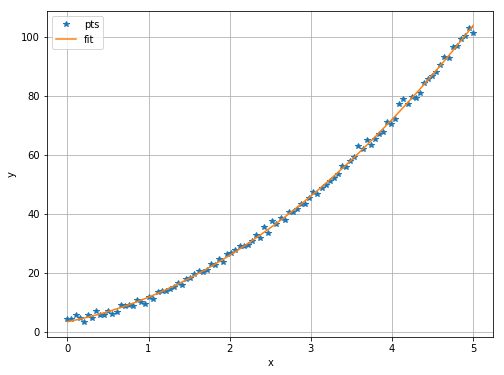

In [52]:
num_pts = 100
poly_size = 3 # include the the y intercept as 1

#set up x data
x = np.linspace(0,5,num_pts)
#set up y data with random data added to it
y = 5*x+4+3*x**2 +np.random.randn(num_pts)

#make X matrix
def make_X(x,poly_size):
    X=np.repeat(x.reshape(-1,1),poly_size,axis=1)
    for i in range(poly_size):
        X[:,i] = X[:,i]**i 
    return X

X = make_X(x,poly_size)

#Work out max likeliehood model parm theta = (X^TX)^-1X^TY
theta =np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

#Work out variance of model
var = (y-X.dot(theta)).T.dot(y-X.dot(theta))/num_pts

#make new y data with estaimted theta values
def make_new_Y(x,theta):
    Y=theta[0]
    print("fit: y= {} ".format(theta[0]),end='')
    for i in range(1,len(theta)):
        Y+=theta[i]*(x**i)
        print("+(x^{})*{} ".format(i,theta[i]),end='')
    print("")
    return Y

#plot
fig, axes = plt.subplots(figsize=(8, 6))
p1, = axes.plot(x,y,'*',label="pts")
p2, = axes.plot(x,make_new_Y(x,theta),label="fit")
axes.legend(handles=[p1,p2])
axes.set_xlabel
axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("y")

print("variance: ",var)

Thinking of putting 3D plot with z axis being Gaussian height

In [53]:
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure
# output_notebook()

## Gradient descent
Another thing you do which can be useful when their is not exact solution is Gradient descent. Gradient descent is essentically a updating weights technique. With our regression model we had the loss being the mean square error:


$$ Loss = \frac{1}{2\sigma}\sum_i^N y_i-g(x_i|\theta))^2$$


Where for a linear model $g(x_i|\theta) = \theta_1 x_i+\theta_0$. Finding the dervative of this is it becomes:


$$ \frac{d Loss}{d\theta} = \frac{1}{\sigma}\sum_i^N (\theta x_i-y_i)x_i$$

Then gradient descernt is updating the weights by the gradient i.e:


$$ \theta_{j+1} = \theta_{j}- \alpha\sum_i^N (\theta x_i-y_i)x_i$$

where $\alpha = \frac{a}{\sigma}$, where a is some weighting factor. Making this more general and in vector form we obtain:

$$ \theta_{j+1} = \theta_{j}- \alpha X^T(X\theta-Y)$$


You find this technique use a lot when exact solutions can not be found and it comes up a lot in nerual network. The weighting $\alpha$ also can not be to large to cause a unstable system, but not too small for it take too long to update. 

Below is some code showing the update, and how the model gets closer after each update till it reaches close to some minimum. Better understanding of this can be seen from the diagram I randomly found below which shows how each update gets closer to the minimum or desired point.

![grad_des](https://qph.ec.quoracdn.net/main-qimg-25913bb0aa0193a5885640a64e8d490f.webp)

fit: y= 1.0 +(x^1)*1.0 +(x^2)*1.0 
fit: y= 1.2970403173703862 +(x^1)*2.04073884802288 +(x^2)*5.048369139877581 
fit: y= 1.226023806311093 +(x^1)*1.7089911301717955 +(x^2)*3.6061235854332216 
fit: y= 1.2848052885504324 +(x^1)*1.8620583712611811 +(x^2)*4.10469685491939 
fit: y= 1.297414665248331 +(x^1)*1.8434581236567826 +(x^2)*3.9173604950269985 
fit: y= 1.3260531629630412 +(x^1)*1.8852344426419103 +(x^2)*3.9725617658914554 


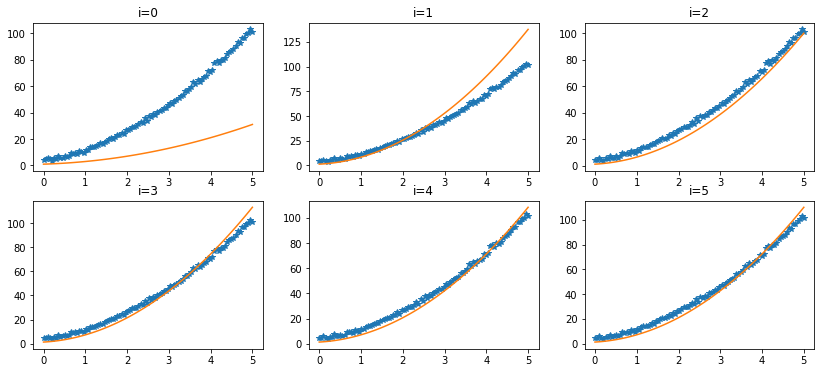

In [54]:
#Initalize params
thetan = np.ones(poly_size)
alpha = 0.0001


#Plot the inital params 
fig, axes = plt.subplots(2,3,figsize=(14, 6))
p1, = axes[0,0].plot(x,y,'*',label="pts")
p2, = axes[0,0].plot(x,make_new_Y(x,thetan),label="fit")
axes[0,0].set_title("i=0")

k=0
j=1
#Plot after each update
for i in range(10):
    thetan -= alpha*X.T.dot((X.dot(thetan)-y))
    p1, = axes[k,j].plot(x,y,'*',label="pts")
    p2, = axes[k,j].plot(x,make_new_Y(x,thetan),label="fit")
    axes[k,j].set_title("i={}".format(i+1))
    j+= 1
    if j == 3:
        j=0
        k+= 1

    if k == 2:
        break

    




# Over & Under Fitting

When training model or just trying to to fit some data(can be a regression or classification problem) their are two possibilities that you tend to not want:

* Underfitting: Which is when the model does not accuratly represent or fit the data coming in.

-For example incoming data might be distrubuted as qudratic function and you try to fit it to linear model, you will find that your model can not represent all new incoming data.

-Another example is when you do not have enough data and you fit data to that such as having 3 data points to fit a linear model to. You will find that new incoming data might be widely different to those 3 data points.

* Overtfitting: This is when you model fits the data too well, including the noise and so when new data comes it can be classified poorly.

-One example of this is building a very complex model or classifier of a set of data. The classifier does very well on the test data. But when you want to classify a new data point it does very horribly because its "overfitted to the orignal test data"

Actually as a rule of thumb will find that more simple models are more general, but might not fit the data as well and complicated models fit data well, but have tendency to overfit. 

This is why when you do lots of machine learning you tend to break your data into a training and valadation set, and test the error on both. When you find that the training error starts to decrease far less than the valdation set error then you have overfitting.  


## Some Example Code of Under/Over Fitting

We will test over and under fitting using regression. This time i will use the numpy poly fit for fitting data. In this example i produce a sine wave and try to fit varying degree of polynomails to it and measure the error or Residue(square error) for each fit.

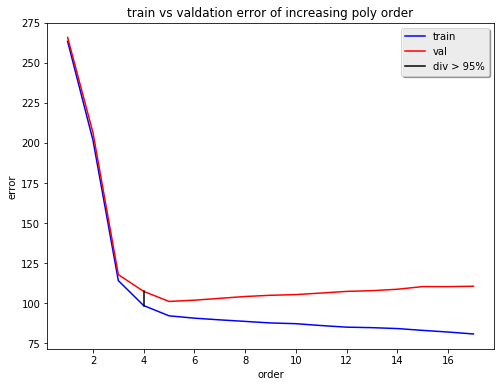

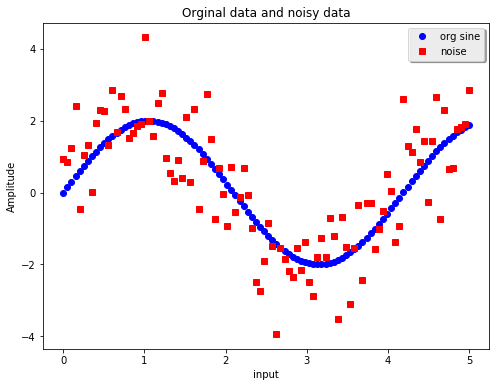

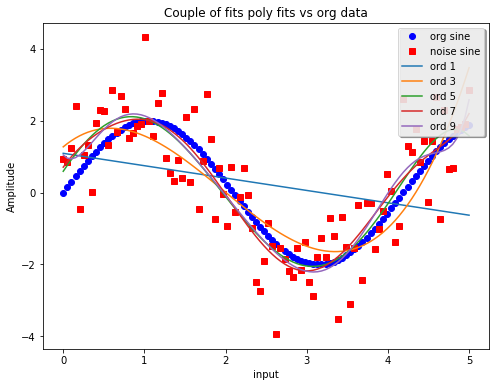

In [4]:
#Setting up what order polynomial fitting will go up too
order = range(1,18)
#residue/error for each polynomail fit training data setup
restrainm = np.zeros((len(order)))
#Residue for each poly order for valdation data setup
resvalm = np.zeros((len(order)))

#setting up x data
x = np.linspace(0,5,100)
#Setting up noise free Sine wave
f = 2*np.sin(1.5*x)

#Setting up data for training sine wave
num_data = 100
x2= np.linspace(0,5,num_data)

#loop n times to get a average
n=15
np.random.seed(10)
for j in range(n):
    
    #make train data
    f2 = 2*np.sin(1.5*x2)+np.random.randn(num_data)
    #Make val data
    f3 = 2*np.sin(1.5*x2)+np.random.randn(num_data)
    
    #settiing up error for each poly order
    restrain = np.zeros((len(order)))
    resval = np.zeros((len(order)))
    
    for i in order:
        #Polynomially Fit data and get total error
        coefs, restrain[i-1], _, _, _ = np.polyfit(x2,f2,i,full=True)
        
        #can also get total resuidual by:
        #yfit = np.polyval(coefs,x)
        #res = np.sum((f2-yfit)**2)
        #or
        #res = np.std(f2-yfit)**2*len(f2)

        #Evaluate polynimal data with given X data
        yfit = np.polyval(coefs,x2)
        
        #Find difference/error between val and fit data
        resval[i-1] = np.sum((f3-yfit)**2)

    #Sum errors for every poly tested
    restrainm += restrain
    resvalm += resval

#Average errors
restrainm /= n
resvalm /= n

#point of train and val error diverging
#5 % divergence
diff = (restrainm/resvalm)
indexDiv, = np.where(diff < 0.95)
indexDiv = indexDiv[0]

#Plot and compare training with valdation
#See the overfitting process
fig, axes = plt.subplots(figsize=(8, 6))
train, = axes.plot(order,restrainm,'b',label = 'train')
val, = axes.plot(order,resvalm,'r',label = 'val')
overfit, = axes.plot([indexDiv+1,indexDiv+1],[resvalm[indexDiv],restrainm[indexDiv]],'k',label="div > 95%")
axes.legend(handles = [train, val,overfit],loc='upper right', shadow=True)
axes.set_xlabel('order')
axes.set_ylabel('error')
axes.set_title("train vs valdation error of increasing poly order")



#Plot orginal data and noisy data example
fig, axes2 = plt.subplots(figsize=(8, 6))
org, = axes2.plot(x,f,'bo',label = 'org sine')
noise, = axes2.plot(x2,f2,'rs',label = 'noise')
axes2.legend(handles = [org, noise],loc='upper right', shadow=True)
axes2.set_xlabel('input')
axes2.set_ylabel('Amplitude')
axes2.set_title("Orginal data and noisy data")



#Plot orginal data and noisy data example
fig, axes3 = plt.subplots(figsize=(8, 6))
org, = axes3.plot(x,f,'bo',label = 'org sine')
noise, = axes3.plot(x2,f2,'rs',label = 'noise sine')
handles = [org,noise]
axes3.set_xlabel('input')
axes3.set_ylabel('Amplitude')
axes3.set_title("Couple of fits poly fits vs org data")


for i in order[:9:2]:
    coefs, _, _, _, _ = np.polyfit(x2,f2,i,full=True)
    yfit = np.polyval(coefs,x2)
    tmpHandle, = axes3.plot(x2,yfit,label = 'ord {}'.format(i))
    handles.append(tmpHandle)



axes3.legend(handles = handles,loc='upper right', shadow=True)



You can see in the plots that once the polynomail gets over a certain order the training error keep reducing, but the valdation does not. Can see thats a point of overfitting.